# Importing Libraries

In [6]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

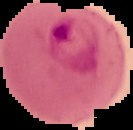

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
# Plot the image
def imshow(img, ax=None):
	if ax is None:
		ret, encoded = cv2.imencode(".jpg", img)
		display(Image(encoded))
	else:
		ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
		ax.axis('off')
def select_image():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select an Image",
                                           filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tiff")])
    if not file_path:
        raise ValueError("No file selected!")
    return file_path
#Image loading
image_path = select_image()
#img = load_image(image_path)
img = cv2.imread(image_path)
#img = cv2.imread("C33P1thinF_IMG_20150619_115740a_cell_162.png")
# Show image
imshow(img)


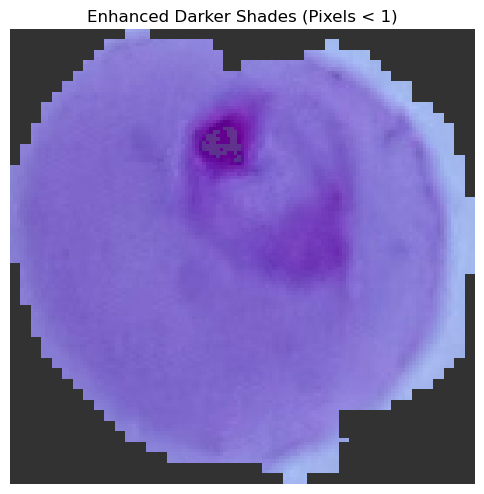

In [11]:

    # Create a copy of the image to avoid modifying the original
    modified_image = img.copy()
    value =50
    threshold = 1
    if threshold is not None:
        # Increase intensity of pixels below the threshold (darker shades)
        modified_image[img < threshold] = np.clip(img[img < threshold] + value, 0, 255)
    display_image(modified_image, title=f'Enhanced Darker Shades (Pixels < {threshold})')
   

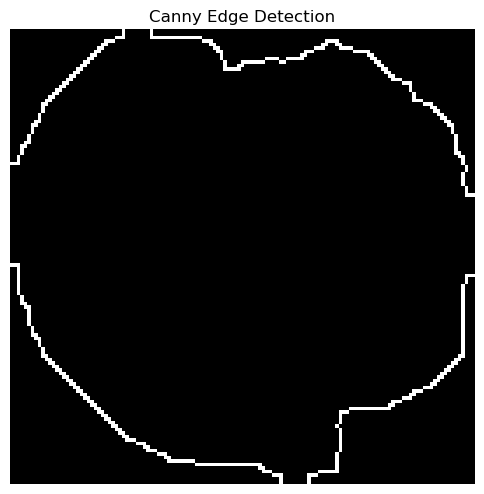

In [12]:
    # Apply Gaussian Blur to smooth the image
    blurred_img = cv2.GaussianBlur(img, (5, 5), 1.4)
    
    # Perform Canny edge detection
    edges = cv2.Canny(blurred_img, 100, 200)
    
    # Display the original and edge-detected images
    display_image(edges, title='Canny Edge Detection')
    kernel = np.ones((5, 5), np.uint8)
    
    # Apply dilation and erosion
    dilated = cv2.dilate(edges, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

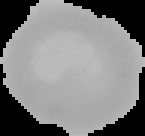

In [39]:
#image grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)


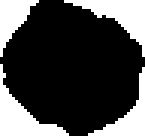

In [40]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray,
							0, 255, 
							cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(bin_img)

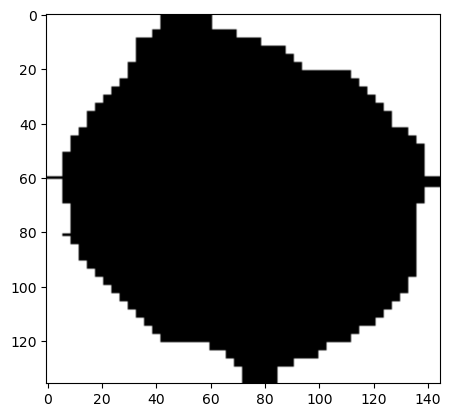

In [41]:
# sure background area
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
plt.imshow(sure_bg, cmap='gray')

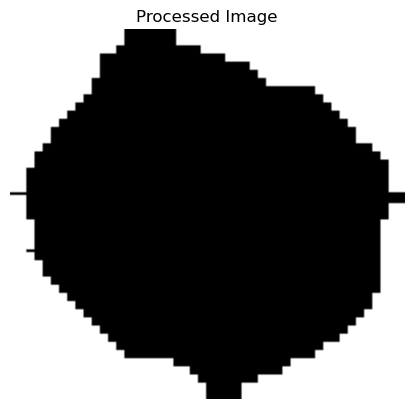

In [42]:
des = cv2.bitwise_not(sure_bg)

# Find contours
contours, hierarchy = cv2.findContours(des, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the inverted image
for cnt in contours:
    cv2.drawContours(des, [cnt], 0, 255, -1)

# Invert the image back to the original state
gray = cv2.bitwise_not(des)

# Save or display the result
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')  # Hide axes
plt.show()



In [43]:
# Read the images
image1 = gray
image2 = sure_bg

# Ensure the images have the same size
if image1.shape != image2.shape:
    raise ValueError("Images must have the same dimensions")

# Subtract the images
diff = cv2.absdiff(image1, image2)

# Compute the sum of absolute differences
sad = np.sum(diff)

print(f'Sum of Absolute Differences: {sad}')


Sum of Absolute Differences: 0
